(python_l10)=

# Финальная лекция обо всем и ни о чем

Автор(ы):

- [Котенков Игорь](https://github.com/stalkermustang)


## Описание лекции

В этой лекции будет:
- рассказ о типовых ошибках при прохождении курса;
- разбор примеров кода из курса;
- дополнение для самых любознательных о `Python`, ML и вообще.

## Заметки по прохождению курса

Хоть в пройденных лекциях по `Python` и содержится большое количество материала, проиллюстрированного примерами, с указанием на дополнительные темы для самостоятельного изучения -- это все еще малая доля того, с чем вам придется столкнуться, если захочется продолжить развитие в теме ML/QML. Да, это грустно, но такова правда жизни. А еще вы столкнетесь с кучей проблем и ошибок во время прохождения самого курса. Если вы **попытались разобраться** с чем-либо, но у вас не получилось -- приходите к нам в сообщество в Slack, задавайте вопросы. Не забывайте и о взаимопомощи другим студентам -- если материал или тема дались вам легко, то кому-то они могут показаться адски сложными.

Помните, что абсолютное большинство возникающих ошибок в `Python` неуникально, и вы не первый, кто наступил на эти грабли. Не стесняйтесь пользоваться поисковиками для нахождения решений. Но перед этим обязательно прочитайте текст ошибки, попробуйте осознать, о чем `Python` хочет вам сказать - в этом языке программирования одни из самых понятных и доступных подсказок и указателей на проблемы. К примеру, `IndexError: list index out of range` явно говорит о том, что во время обращения к i-тому объекту некоторого списка (который, кстати, будет указан в так называемом трейсбеке, от англ. traceback) возник выход за границы `list`. Возьмем для примера список `sample_list` чисел длины 5. Что произойдет, если обратиться к седьмому объекту `sample_list[7]`?

```{figure} /_static/python/ru/python_l11/example_traceback.png
:name: example_traceback
:width: 550px

Получим ошибку
```

Обратите внимание на стрелочку слева, указывающую на строку номер 5 (кстати, в Jupyter Notebook для каждой отдельной ячейки можно включить нумерацию строк для удобства навигации с помощью клавиши `l`). Это место возникновения ошибки, та строка, на которой `Python` не смог выполнить инструкцию. Как можно решить проблему? Для начала **методом пристального взгляда** поймите, написано ли в коде то, что вы хотели -- очень часто код, к примеру, копируется (хотя нужно избегать этого с помощью написания функций), но переменные в нем не меняются в силу невнимательности. Если все переменные в строке те же, что и должны быть, и ошибка не ясна, то следует заняться [отладкой кода](https://ru.wikipedia.org/wiki/Отладка_программы).

Самый простой способ отладки в Jupyter -- это расстановка `print`'ов до проблемной строки. Да-да, так кустарно и грубо. Есть более продвинутые технологии (например, [отладчики](https://code.visualstudio.com/docs/python/debugging) в IDE, то есть средах разработки), однако они выходят за рамки данного курса. Очевидный совет - нужно размещать такой `print`, который помогает проверить какую-либо **гипотезу** о происхождении ошибки. Предложение таких гипотез -- это отдельный навык, который приходит с опытом, так что не переживайте, что поначалу получается плохо "угадывать" и "понимать" ошибки.

В случае обращения по неверному индексу (`list index out of range`) логично предположить, что индекс оказался больше максимально возможного значения. Давайте выведем длину списка и индекс, по которому хотим обратиться:

```{figure} /_static/python/ru/python_l11/example_debug.png
:name: example_debug
:width: 550px

Строчку с вашим отладочным выводом легко потерять - для удобства можно добавлять какие-то символы или текст.
```

И исходя из аргументов выше становится очевидно, в чем именно проблема. Конечно, рассмотренный случай крайне тривиален, однако он показывает базовые приемы поиска причин ошибок. Отметим также такой полезный прием как разбитие проблемной строки кода на подстроки, то есть разнесение кода на отдельные изолированные куски. В данном примере в отдельную переменную был записан индекс. Однако попробуйте угадать, в каком месте происходит ошибка в коде ниже:

```{figure} /_static/python/ru/python_l11/debug_hard.png
:name: debug_hard
:width: 550px

Трейсбек ошибки предательски указывает на функцию, при вызове которой возникла ошибка - `third_f`
```

Это уже более сложный пример, когда трейсбек состоит из двух блоков. Указатель на ошибку как бы "проваливается" внутрь вызываемой функции и показывает, что не так. В данном случае ошибка `TypeError: unsupported operand type(s) for +: 'int' and 'str'` указывает на несовместимость типов операндов в операции сложения. Слева `int`, справа `str` -- ну и как же их суммировать?

Однако исходная строчка, порождающая ошибку, крайне сложна. Мы вызываем функцию (`print`) от функции (`first_f`) от функции... Будь логика в коде чуть сложнее -- легко можно было бы запутаться, что именно породило ошибку (главное обращайте внимание на заголовки трейсбека, указывающие на названия методов и функций). С разбиением все проще:

```{figure} /_static/python/ru/python_l11/debug_solved.png
:name: debug_solved
:width: 550px

Вуаля! Указатель в виде стрелочки прямо рапотрует о том, что проблема в вычислении `third_f`. Дальше можно было бы добавить `print(tmp1)` для того, чтобы увидеть входные параметры и попытаться понять, в чем же проблема.
```

На этом остановимся, блок обязательно будет дополняться по мере возникновения типовых ошибок и способов их поимки. Главное помните, что можно распечатать и аргументы функции/метода, и атрибуты класса (в том числе скрытые/промежуточные состояния квантовой среды), и результаты расчетов.

## Примеры кода, не разобранные в лекциях

Ранее весь код, который упоминался в лекциях (за вычетом примера из первой) был написан на чистом `Python` без сторонних библиотек, которые мы так нахваливали. В курсе же, разумеется, они встретятся. Полезно поговорить о двух вещах - об **импортах** библиотек и об их алиасах.

Для того, чтобы использовать какой-либо объект из сторонней библиотеки, будь то функция, класс или даже словарь (например, с физическими константами), необходимо знать, в какой библиотеке и по какому пути он лежит. Все это описано в документации, а также в примерах кода в курсе. Не переживайте, если они плохо запоминаются - чаще всего их копируют, и со временем в голове откладывается паттерн. И все же для того, чтобы получить доступ к библиотеке, нужно сделать следующее -- рассмотрим на примере [`numpy`](https://numpy.org/), библиотеки для алгебраических расчетов. Сначала следует ключевое слово `import`, затем через пробел название пакета. Опционально через `as` можно добавить алиас - название, под которым можно будет обращаться в коде для доступа к функциям. У многих пакетов есть общепринятые алиасы, с которыми все знакомы. Для `numpy` это `np`. Итак,

In [1]:
import numpy as np

np_example_array = np.array([1,2,3])
print(f"{np_example_array.shape = }")

abs_res = np.abs(-2)
print(f"{abs_res = }")

np_example_array.shape = (3,)
abs_res = 2


По сути обращение схоже с объявлением объекта класса или же каким то методом - ведь можно импортировать не целый пакет, а его часть!

In [2]:
from numpy import zeros

zeros_matrix = zeros(shape=(1, 3))
print(f"{zeros_matrix = }")

zeros_matrix = array([[0., 0., 0.]])


Здесь `zeros` - **функция**, формирующая матрицу из нулей заданного размера.

Или, к примеру, для отрисовки визуализаций часто используют следующую библиотеку (мы уже с ней сталкивались):

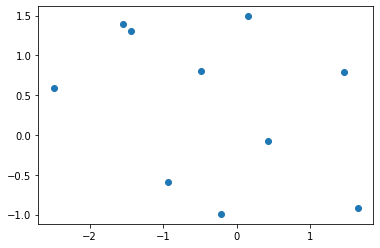

In [3]:
import matplotlib.pyplot as plt

plt.scatter(np.random.randn(10), np.random.randn(10));
plt.show();

```{tip}
В коде выше в последних двух строчках стоит `;`. Это необязательный символ, означающий конец команды. В большинстве других языков программирования необходимо всегда в конце строки оставлять этот символ, однако в питоне сигналом о конце инстуркции служит перенос строки.
Почему же здесь они поставлены? Во-первых, чтобы показать, что они означают -- чтоб вы не переживали, когда встретите подобное. Во-вторых, `plt.show()` возвращает объект после вызова метода. `Jupyter` же по умолчанию выводит последнее возвращенное значение. Попробуйте убрать точку с запятой и посмотреть в своем ноутбуке, что выйдет. Таким образом, в данном случае окончание команды `;` говорит, что возвращаемая переменная никуда не будет записана и будет удалена - поэтому при ее наличии подпись объекта не возвращается.
```

В коде сначала происходит импорт, затем вызывается отрисовка точек (см. [документацию тут](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter)), где координаты `X` и `Y` получаются случайно из нормального распределения от `-1` до `1`. Но сам по себе вызов `scatter()` лишь добавляет точки на график, но не отрисовывает его - за это отвечает вызов `plt.show()`. Стоит заметить, что `plt` хранит в себе "полотно", на котором рисует, и результат добавления точек через `scatter` не нужно записывать в какую-либо переменную -- все это хранится во внутреннем состоянии самой библиотеки. Помните урок про классы и их объекты, задающие состояние системы? Здесь ровно то же самое! Более того, аналогичный функционал будет у библиотеки для квантовых вычислений, с которой вы познакомитесь далее по курсу (под алиасом `qml`). Теперь, надеемся, картинка начинает складываться!

## Блок дополнительных ссылок

Ниже представлен набор ссылок, которые предлагается просмотреть для расширения кругозора и лучшего понимания материала. Это бонусный материал, необязательный к изучению. Но если вас захватила идея получше познакомится со своим инструментом, то почему нет?

1. [Курс по Python](https://github.com/trekhleb/learn-python) в виде примеров кода с очевидными и не очень механиками языка. Хорошо подойдет как дополнение к примерам в курсе;
2. [realpython](https://realpython.com/) -- сайт с большим количеством разнообразных уроков по `Python` на английском;
3. [Огромный список](https://github.com/kirang89/pycrumbs) ссылок на разные статьи по всем темам - от основ `Python` и до продвинутых приемов в разработке;
4. [И другой](https://github.com/vinta/awesome-python) -- с набором ссылок на код разных программ. Игры, видеопроигрыватели и прочее - все тут;
5. [Простой отладчик](https://github.com/alexmojaki/snoop) на случай, если начали путаться в своем коде, а продвинутые инструменты кажутся очень сложными и громоздкими.

```{tip}
Как ставить новые библиотеки в `Python` -- вот хотя бы тот же отладчик из пункта 5? Вспоминайте совет -- гугл ваш лучший друг. "how to install python library" (да, прямо дословно library = библиотека) -- и вы на коне!
```

## Вместо заключения

Что ж, вот и подошел к концу первый блок курса. Его можно назвать самым сложным -- нет, не с точки зрения материала и его научности, но по количеству усилий, которые необходимо приложить, чтобы не сбиться с пути и продолжить обучение несмотря на трудности. Именно тут большая часть людей машет рукой и закрывает курс. Если ты, дорогой студент, читаешь это, то мы безумно рады за твои достижения и подвиги, и желаем дальнейших успехов в прохождении курса!

```{figure} /_static/python/ru/python_l11/cats_show_love_differently.jpeg
:name: cats_show_love_differently
:width: 350px
```